1. Используя подходы Линейной или Логистической Регрессии (как пример метод
наименьших квадратов) укажите зависимость роста (player_height) от веса
(player_weight) для уникальных игроков всех команд по всем сезонам.
Постройте визуализацию используя библиотеки Matplotlib / Seaborn.

In [ ]:
!wget -O dataset.csv https://drive.google.com/file/d/1JKD7Gx9BeIYTUFP9A0j3-A5evRR8dU_z/view?usp=share_link

--2023-04-13 12:23:46--  https://drive.google.com/file/d/1JKD7Gx9BeIYTUFP9A0j3-A5evRR8dU_z/view?usp=share_link
Resolving drive.google.com (drive.google.com)... 142.251.2.101, 142.251.2.102, 142.251.2.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘dataset.csv’

dataset.csv             [ <=>                ]  74.44K  --.-KB/s    in 0.006s  

2023-04-13 12:23:46 (11.5 MB/s) - ‘dataset.csv’ saved [76222]



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
scaled_data = pd.read_csv('/content/dataset.csv', sep = ',')
scaled_data.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


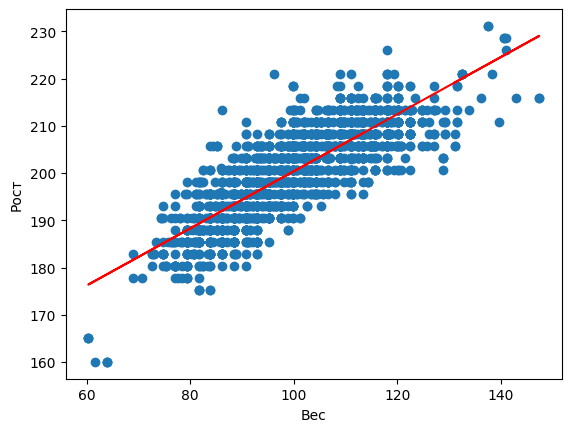

In [ ]:
#используется линейная регрессия
model = LinearRegression()
X = scaled_data.player_weight.to_numpy().reshape(-1,1)
y = scaled_data.player_height
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.xlabel('Вес')
plt.ylabel('Рост')
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')


2. Используя алгоритм Дерева Принятия Решения попробуйте определить
название команды (team_abbreviation) как целевое значение функции (Y) за
сезон 2010-11 от следующих атрибутов (𝑋 )
𝑖
- Среднее pts всех игроков команды за сезон
- Среднее reb всех игроков команды за сезон
- Среднее ast всех игроков команды за сезон
- Среднее player_height всех игроков команды за сезон
- Среднее player_width всех игроков команды за сезон

In [ ]:
data_set = scaled_data.where(scaled_data.season == '2010-11').groupby('team_abbreviation', as_index = False).mean()[['team_abbreviation','pts','reb','ast','player_height','player_weight']]
X = data_set.drop('team_abbreviation',axis=1)
y = data_set['team_abbreviation']

tree = DecisionTreeClassifier(max_depth=30)
tree.fit(X, y)

X_test = np.array([X.iloc[29]]) + 0.01
print('Параметры поиска:', X_test)

y_pred = tree.predict(X_test)

print('Результат поиска:', y_pred)

print('Исходные данные:\n',data_set.iloc[29])

Параметры поиска: [[  7.65705882   3.31588235   1.45117647 201.86529412 101.32110729]]
Результат поиска: ['WAS']
Исходные данные:
 team_abbreviation           WAS
pts                    7.647059
reb                    3.305882
ast                    1.441176
player_height        201.855294
player_weight        101.311107
Name: 29, dtype: object


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


3. Используя ваш личный выбор атрибутов постройте кластеризацию данных по
любому атрибуту-признаку (в том числе можете построить новый вычисляемый
атрибут-признак)

In [ ]:
#на основе атрибутов pts, reb, ast определяется позиция игрока: нападающий, защитник или центровой
df = scaled_data.copy()
df.fillna(0, inplace = True)
df.isnull().values.any()

#рассчитываем позицию игрока для тренировочного набора данных на основании превышения соответствующего среднего показателя над показателями 75% игроков
df['player_position'] = np.where(df.pts >= 11.5, 'forward', '')
df['player_position'] = np.where(df.reb >= 4.7, 'guard', df['player_position'])
df['player_position'] = np.where(df.ast >= 2.4, 'center', df['player_position'])

df.drop(labels='player_name', axis=1, inplace= True)
df.drop(labels='team_abbreviation', axis=1, inplace= True)
df.drop(labels='college', axis=1, inplace= True)
df.drop(labels='country', axis=1, inplace= True)
df.drop(labels='draft_year', axis=1, inplace= True)
df.drop(labels='draft_round', axis=1, inplace= True)
df.drop(labels='draft_number', axis=1, inplace= True)
df.drop(labels='season', axis=1, inplace= True)
df.drop (columns=df.columns [0], axis= 1 , inplace= True )

train = df.where(df.player_position != '')
train.dropna(how='all', inplace=True) 
train = train.reset_index(drop=True)
test = df.where(df.player_position == '')
test.dropna(how='all', inplace=True) 
test = test.reset_index(drop=True)
X_train = train.drop(labels='player_position', axis=1)
y_train = train.player_position
X_test = test.drop(labels='player_position', axis=1)
y_test = test.player_position 

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#точность на исходных данных
print(knn.score(X_train,y_train))

#кросс проверка на исходных данных (так как в тестовых отсутствует информация о позиции игрока)
results = knn.predict(X_train)
print(pd.crosstab(y_train, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total'))

0.9070178539862118
Predicted  center  forward  guard  total
Real                                    
center       2997       38    169   3204
forward       133      174     35    342
guard         143        8   1960   2111
total        3273      220   2164   5657


4. Используя отрывок представленный ниже (отрывок из книги Учебник 4CDTO),
проведите пожалуйста над ним следующие методы NLP алгоритмов
a) Токенизация по словам
b) Стемминг и лемматизация
c) Удаление стоп слов
d) Примените алгоритм NER (Named Entity Recognition)

In [ ]:
example_document = '''Цитируя McKinsey&Company: «В современной реальности инновации нужны бизнесу не только
для ускорения темпов развития, укрепления лидерства и отрыва от конкурентов, но и для
своевременной защиты от ущерба для отрасли в случае внедрения радикальных инноваций,
делающих экономически нецелесообразными целые направления бизнеса».
Возможность резкой потери доли рынка, изменение паттернов потребления у нового поколения
и рост его численности, возрастающий спрос на цифровые продукты и услуги, появление новых
бизнес- моделей — эти и другие факторы сделали цифровую трансформацию задачей 1 на
повестке дня компаний, образовательных учреждений и органов власти. По данным
statista.com, мировые затраты на цифровую трансформацию в 2017 году достигли 0,96
триллиона долларов США, в 2018 — 1 триллион долларов США, в 2019 — 1,18 триллиона
долларов США. Прогнозы показывают, что затраты продолжают расти и удвоятся в ближайшие
3 года.
В соответствии с ежегодным опросом Deloitte, проводимом среди директоров по маркетингу
крупнейших корпораций, 87% компаний ожидают, что их бизнес столкнётся с дисраптом со
стороны технологических стартапов. При этом только 30% компаний верят, что они обладают
необходимыми навыками и качествами, чтобы перейти на цифровую бизнес-модель. По
прогнозу президента компании Cisco Systems Джона Чэмберса, в течение 10 лет исчезнут 40%
компаний, которые мы видим сегодня, при этом 70% существующих компаний попытаются
трансформироваться под новые условия цифровой экономики, но лишь у 30% из них это
получится'''

In [5]:
!pip install --upgrade transformers sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.8 MB/s eta 0:00:00


In [3]:
!python -m spacy download ru_core_news_sm

2023-04-27 12:50:46.291622: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 51.6 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=5a952ce51b9011ec4d9eea8d85a092f8c81905d19dd8d595cebd3c7dee450618
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


In [6]:
import spacy
from transformers import *

/usr/local/lib/python3.9/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(


In [ ]:
sp_lg = spacy.load('ru_core_news_sm')

In [ ]:
def spacy_large_ner(document):
  return {(ent.text.strip(), ent.label_) for ent in sp_lg(document).ents}

In [ ]:
#Токенизация
spacy_large_ner(example_document)

{('Cisco Systems', 'ORG'),
 ('Deloitte', 'ORG'),
 ('Джона Чэмберса', 'PER'),
 ('США', 'LOC')}

In [ ]:
def spacy_lemmas(document):
  return {token.lemma_ for token in sp_lg(document)}

In [ ]:
#Лемматизация
spacy_lemmas(example_document)

{'\n',
 '"',
 '%',
 ',',
 '-',
 '.',
 '0,96',
 '1',
 '1,18',
 '10',
 '2017',
 '2018',
 '2019',
 '3',
 '30',
 '40',
 '70',
 '87',
 ':',
 'cisco',
 'deloitte',
 'mckinsey&company',
 'statista.com',
 'systems',
 'При',
 'бизнес',
 'бизнес-',
 'ближайшие',
 'в',
 'верить',
 'видеть',
 'власть',
 'внедрение',
 'возможность',
 'возрастающий',
 'год',
 'данным',
 'делать',
 'день',
 'джон',
 'директор',
 'дисраптом',
 'для',
 'доллар',
 'доля',
 'достигнуть',
 'другие',
 'ежегодный',
 'задачей',
 'затрата',
 'защита',
 'и',
 'из',
 'изменение',
 'инноваций',
 'инновация',
 'исчезнуть',
 'качество',
 'компаний',
 'компания',
 'конкурент',
 'корпораций',
 'которые',
 'крупнейших',
 'лидерство',
 'лишь',
 'маркетинг',
 'мировой',
 'моделей',
 'модель',
 'мы',
 'на',
 'навык',
 'направление',
 'не',
 'необходимый',
 'нецелесообразный',
 'них',
 'но',
 'новый',
 'нужный',
 'обладать',
 'образовательный',
 'ожидать',
 'он',
 'они',
 'опрос',
 'орган',
 'от',
 'отрасль',
 'отрыв',
 'паттерн'

In [ ]:
#Удаление стоп слов
sp_lg.Defaults.stop_words.add("это")
sp_lg.Defaults.stop_words.add("этот")

all_stopwords = sp_lg.Defaults.stop_words
print(all_stopwords)

{'давайте', 'данное', 'отовсюду', 'таков', 'вокруг', 'один', 'ею', 'собою', 'ком', 'кроме', 'ша', 'е', 'наподобие', 'эдакий', 'которое', 'можете', 'ч', 'з', 'меньше', 'н', 'некем', 'через', 'нашу', 'оный', 'та', 'вся', 'бывают', 'низко', 'саму', 'томах', 'необходимые', 'вновь', 'нашею', 'навряд', 'некуда', 'нужно', 'ого', 'одной', 'этак', 'наиболее', 'настоящий', 'сразу', 'дополнительно', 'пор', 'тем', 'се', 'после', 'самая', 'другими', 'покуда', 'вот', 'некому', 'своею', 'агу', 'одни', 'всякой', 'эй', 'было', 'таки', 'причем', 'совсем', 'такою', 'должен', 'а', 'эдак', 'ишь', 'и', 'напротив', 'любое', 'этою', 'наша', 'более', 'начала', 'спустя', 'своем', 'какою', 'может', 'яко', 'взаимно', 'алло', 'ещё', 'мною', 'ними', 'всегда', 'ничем', 'их', 'кого', 'его', 'спокону', 'имел', 'тебе', 'смогут', 'гораздо', 'стали', 'этим', 'ш', 'моей', 'самому', 'отчему', 'поприще', 'нигде', 'эта', 'г', 'такие', 'ха', 'накануне', 'всеми', 'бац', 'гав', 'никакой', 'при', 'этакий', 'бывает', 'чтоб', 'буд

In [7]:
#Применяем NER алгоритм
ner = pipeline("ner", model="xlm-roberta-large-finetuned-conll03-english")

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-large-finetuned-conll03-english/snapshots/33a83d9855a119c0453ce450858c07835a0bdbed/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-large-finetuned-conll03-english",
  "_num_labels": 8,
  "architectures": [
    "XLMRobertaForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "B-LOC",
    "1": "B-MISC",
    "2": "B-ORG",
    "3": "I-LOC",
    "4": "I-MISC",
    "5": "I-ORG",
    "6": "I-PER",
    "7": "O"
  },
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "label2id": {
    "B-LOC": 0,
    "B-MISC": 1,
    "B-ORG": 2,
    "I-LOC": 3,
    "I-MISC": 4,
    "I-ORG": 5,
    "I-PER": 6,
    "O": 7
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "mo

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--xlm-roberta-large-finetuned-conll03-english/snapshots/33a83d9855a119c0453ce450858c07835a0bdbed/pytorch_model.bin
All model checkpoint weights were used when initializing XLMRobertaForTokenClassification.

All the weights of XLMRobertaForTokenClassification were initialized from the model checkpoint at xlm-roberta-large-finetuned-conll03-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use XLMRobertaForTokenClassification for predictions without further training.
Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-large-finetuned-conll03-english/snapshots/33a83d9855a119c0453ce450858c07835a0bdbed/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-large-finetuned-conll03-english",

loading file sentencepiece.bpe.model from cache at /root/.cache/huggingface/hub/models--xlm-roberta-large-finetuned-conll03-english/snapshots/33a83d9855a119c0453ce450858c07835a0bdbed/sentencepiece.bpe.model
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-large-finetuned-conll03-english/snapshots/33a83d9855a119c0453ce450858c07835a0bdbed/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-large-finetuned-conll03-english/snapshots/33a83d9855a119c0453ce450858c07835a0bdbed/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-large-finetuned-conll03-english",
  "_num_labels": 8,
  "architectures": [
    "XLMRobertaForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "c

In [ ]:

doc_ner = ner(example_document)
doc_ner

[{'entity': 'I-ORG',
  'score': 0.9999949,
  'index': 5,
  'word': '▁Mc',
  'start': 9,
  'end': 11},
 {'entity': 'I-ORG',
  'score': 0.9999858,
  'index': 6,
  'word': 'K',
  'start': 11,
  'end': 12},
 {'entity': 'I-ORG',
  'score': 0.9999902,
  'index': 7,
  'word': 'in',
  'start': 12,
  'end': 14},
 {'entity': 'I-ORG',
  'score': 0.9999907,
  'index': 8,
  'word': 'sey',
  'start': 14,
  'end': 17},
 {'entity': 'I-ORG',
  'score': 0.9999931,
  'index': 9,
  'word': '&',
  'start': 17,
  'end': 18},
 {'entity': 'I-ORG',
  'score': 0.999992,
  'index': 10,
  'word': 'Comp',
  'start': 18,
  'end': 22},
 {'entity': 'I-ORG',
  'score': 0.9999881,
  'index': 11,
  'word': 'any',
  'start': 22,
  'end': 25},
 {'entity': 'I-ORG',
  'score': 0.86417586,
  'index': 148,
  'word': '▁stati',
  'start': 675,
  'end': 680},
 {'entity': 'I-ORG',
  'score': 0.98939824,
  'index': 149,
  'word': 'sta',
  'start': 680,
  'end': 683},
 {'entity': 'I-ORG',
  'score': 0.9142095,
  'index': 151,
  'wo

In [ ]:
def get_entities_html(text, ner_result, title=None):
  """Visualize NER with the help of SpaCy"""
  ents = []
  for ent in ner_result:
    e = {}
    # add the start and end positions of the entity
    e["start"] = ent["start"]
    e["end"] = ent["end"]
    # add the score if you want in the label
    # e["label"] = f"{ent["entity"]}-{ent['score']:.2f}"
    e["label"] = ent["entity"]
    if ents and -1 <= ent["start"] - ents[-1]["end"] <= 1 and ents[-1]["label"] == e["label"]:
      # if the current entity is shared with previous entity
      # simply extend the entity end position instead of adding a new one
      ents[-1]["end"] = e["end"]
      continue
    ents.append(e)
  # construct data required for displacy.render() method
  render_data = [
    {
      "text": text,
      "ents": ents,
      "title": title,
    }
  ]
  spacy.displacy.render(render_data, style="ent", manual=True, jupyter=True)

In [ ]:
# get HTML representation of NER of our text
get_entities_html(example_document, doc_ner)